# Hough Transform

Use the OpenCV functions [HoughLines()](https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a) and [HoughLinesP()](https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb) to detec lines in an image.

- [cv2.HoughLines()](#houghlines)
- [cv2.HoughLinesP()](#houghlinesP)

## Import all the necessary libraries

In [1]:
# import all the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load an image

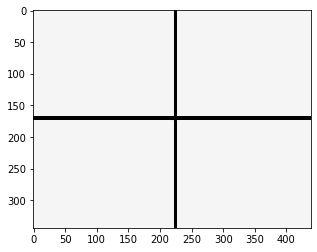

In [2]:
img = cv2.imread("img/horizontal_vertical.jpg")
img2 = np.copy(img)
plt.imshow(img)

## Edge detection

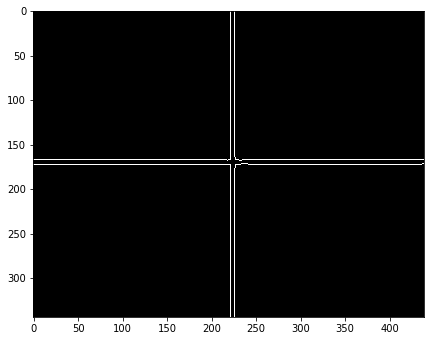

In [3]:
# conver to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# canny
# apertureSize: aperture size for the `Sobel()` operator.
canny = cv2.Canny(blur, 50, 200, apertureSize=3)

plt.rcParams['figure.figsize'] = [7, 7]
plt.imshow(canny, cmap='gray')

#cv2.imshow("canny", canny)
#cv2.waitKey(0)
#cv2.destroyAllWzindows()

<span id="houghlines"></span>
## cv2.HoughLines()

`The Standar Hough Transform`

- It consists in pretty much what we just explained in [hough_transform.ipynb](https://github.com/kaka-lin/self-driving-car/blob/master/finding-lane-lines/hough_transform.ipynb).
  It give you as result as a vector of (ρ, θ)
 
`cv2.HoughLines(img, rho, theta, threshold)`
    - img:       Binary image (type: np.uint8).
    - rho:       Distance resolution of the accumulator in pixels.
    - thets:     Angle resolution of the accumulator in radians. 
    - threshold: Accumulator threshold parameter. 
                 Only those lines are returned that get enough votes (> 𝚝𝚑𝚛𝚎𝚜𝚑𝚘𝚕𝚍).
    
    - return:    Vector of lines

In [4]:
# rho: accuracy of 1 pixel
# theta: accuracy of `np.pi/180` (1 degree)
# threshold: try 300, 400, 500
lines = cv2.HoughLines(canny, 1, np.pi/180, 300)
lines.shape

(4, 1, 2)

### Display the result

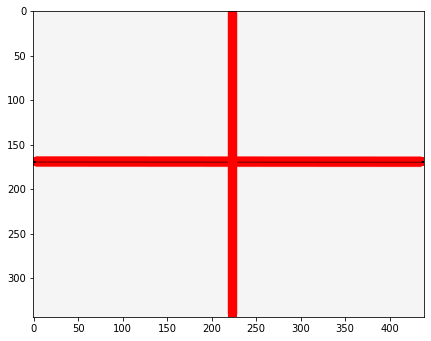

In [5]:
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(img, pt1, pt2, (255, 0, 0), 3, cv2.LINE_AA)
plt.imshow(img)
#cv2.imshow("Hough Line", img)
#cv2.waitKey(0)
#cv2.destroyAllWzindows()

<span id="houghlinesP"></span>
## cv2.HoughLinesP()

`The Probabilistic Hough Line Transform`

- A more efficient implementation of the Hough Line Transform.
  It gives as output the extremes of the detected lines (x0, y0, x1, y1)
 
`cv2.HoughLinesP(img, rho, theta, threshold, minLineLength, maxLineGap)`
    - img:           Binary image (type: np.uint8).
    - rho:           Distance resolution of the accumulator in pixels.
    - thets:         Angle resolution of the accumulator in radians. 
    - threshold:     Accumulator threshold parameter. 
                     Only those lines are returned that get enough votes (> 𝚝𝚑𝚛𝚎𝚜𝚑𝚘𝚕𝚍).
    - minLineLength: Minimum line length. Line segments shorter than that are rejected.
    - maxLineGap:    Maximum allowed gap between points on the same line to link them.

In [6]:
linesP = cv2.HoughLinesP(canny, 1, np.pi/180, 300, 50, 10)
linesP.shape

(4, 1, 4)

### Display the result

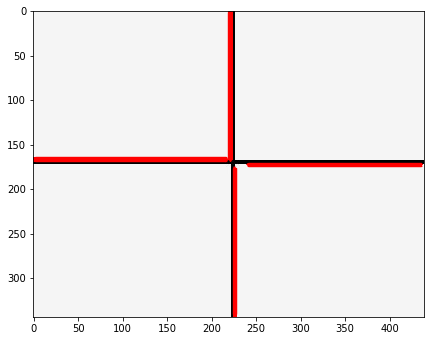

In [7]:
if linesP is not None:
    for i in range(0, len(linesP)):
        line = linesP[i][0]
        cv2.line(img2, (line[0], line[1]), (line[2], line[3]), (255, 0, 0), 3, cv2.LINE_AA)
plt.imshow(img2)